In [271]:
!pip install seaborn
!pip install sklearn
!pip install statsmodels 

You should consider upgrading via the 'c:\users\user\pycharmprojects\finalprojectshecodes\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\pycharmprojects\finalprojectshecodes\venv\scripts\python.exe -m pip install --upgrade pip' command.


You should consider upgrading via the 'c:\users\user\pycharmprojects\finalprojectshecodes\venv\scripts\python.exe -m pip install --upgrade pip' command.


In [299]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import statistics
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import ElasticNet
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.graphics.api import abline_plot
from sklearn import tree
from sklearn import datasets
from sklearn import linear_model
from sklearn import svm
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import preprocessing
from sklearn import utils
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold 
from sklearn.metrics import accuracy_score
from sklearn import metrics

Load data

In [6]:
all_data = pd.read_csv(r"C:\Users\User\Desktop\Final Project\all_data.csv")

In [7]:
all_data.head()

,Country name,continent,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Explained by: Perceptions of corruption,Dystopia + residual,area,population (thousands),avg precipitation,disFromEquator,unemployed_rate_2020,AvgTemp,standard_of_living,independence_year
0,Afghanistan,Asia,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,...,0.481,3.253,652230.0,38041754.0,327.0,3834.685659,11.730000,12.60,bad,1919.0
1,Albania,Europe,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,...,0.485,2.868,28748.0,2854191.0,1485.0,4589.478939,11.700000,11.40,medium,1912.0
2,Algeria,Africa,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,...,0.413,2.839,2381741.0,43053054.0,89.0,4083.825629,12.830000,22.50,medium,1962.0
3,Argentina,America,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,...,0.170,2.967,2780400.0,44938712.0,591.0,-3842.114552,11.670000,14.80,good,1816.0
4,Armenia,Asia,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,...,0.384,2.798,29743.0,2957731.0,562.0,4461.932955,20.209999,7.15,medium,1991.0


Data visualizations - Regional Area

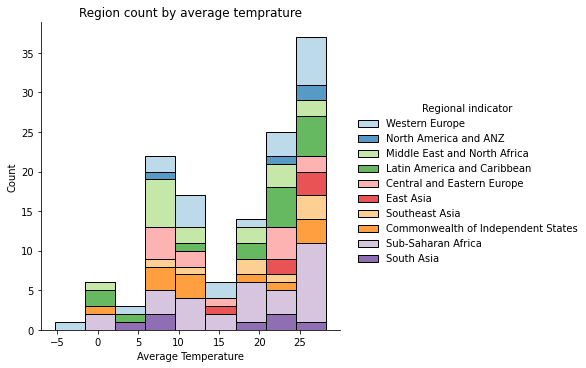

In [8]:
sns.displot(all_data, x="AvgTemp", hue="Regional indicator",multiple="stack", palette='Paired')
plt.title('Region count by average temprature')
plt.xlabel('Average Temperature')
plt.show()

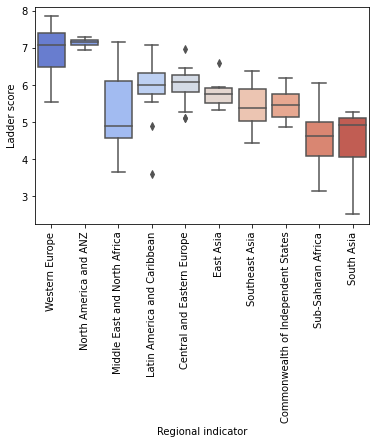

In [9]:
sns.boxplot(x='Regional indicator',y='Ladder score',data=all_data, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

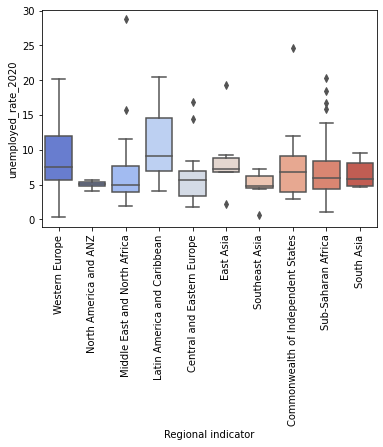

In [10]:
sns.boxplot(x='Regional indicator',y='unemployed_rate_2020',data=all_data, palette='coolwarm')
plt.xticks(rotation=90)
plt.show()

Data visualizations - Country Name

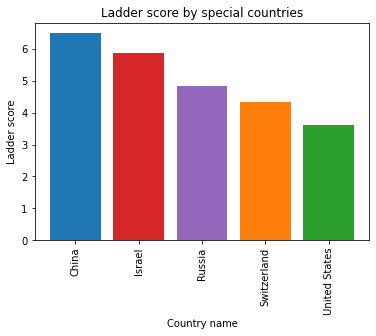

In [11]:
plt.bar(x='Country name',height='Ladder score',data=all_data[all_data['Country name'].isin(['Israel','United States','Russia','China','Switzerland'])]
        ,color = {'tab:blue','tab:orange','tab:green','tab:red','tab:purple'})
plt.xticks(rotation=90)
plt.xlabel('Country name')
plt.ylabel("Ladder score")
plt.title('Ladder score by special countries')
plt.show()

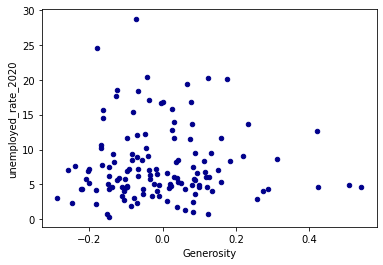

In [12]:
ax1 = all_data.plot.scatter(x='Generosity', y='unemployed_rate_2020', c='DarkBlue')

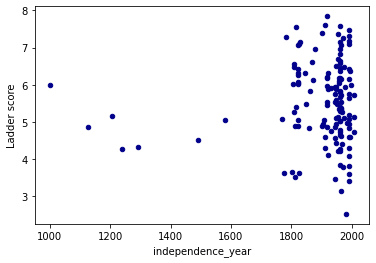

In [13]:
ax1 = all_data.plot.scatter(x='independence_year', y='Ladder score', c='DarkBlue')

In [51]:
pie_lifeLevel_label=all_data_no_nan.groupby('standard_of_living')['Country name'].count().reset_index()
pie_lifeLevel_label

,standard_of_living,Country name
0,bad,28
1,good,47
2,medium,45


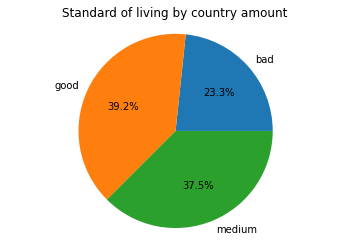

In [52]:
lifeLevel_portion = pie_lifeLevel_label['Country name']

fig, ax = plt.subplots()
my_labels = pie_lifeLevel_label['standard_of_living']
ax.pie(x=lifeLevel_portion, labels=my_labels, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('Standard of living by country amount')

plt.show()

Data visualizations - Continent analysis

In [53]:
GDP=all_data.groupby('continent')['Logged GDP per capita'].median().to_frame().reset_index()
GDP

,continent,Logged GDP per capita
0,Africa,9.6260
1,America,9.5875
2,Asia,9.3825
3,Europe,9.5935
4,Oceania,9.3695


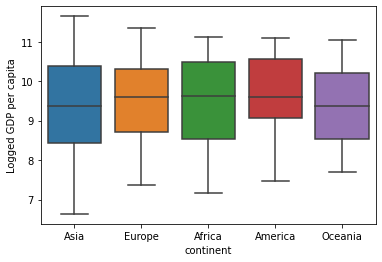

In [54]:
sns.boxplot(x='continent',y='Logged GDP per capita',data=all_data)
plt.show()

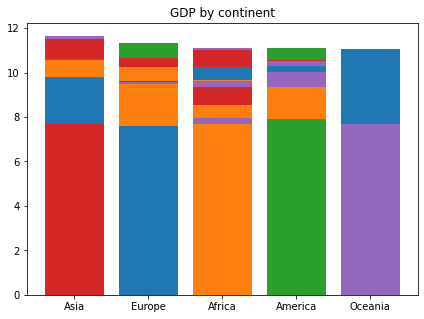

In [55]:
plt.figure(figsize=(7,5))
plt.bar(x=all_data['continent'],height=all_data['Logged GDP per capita'],
        color={'tab:blue','tab:orange','tab:green','tab:red','tab:purple'})
plt.title('GDP by continent')
plt.show()

In [39]:
pie_chart_area_label=all_data_no_nan.groupby('continent')['population (thousands)'].sum().reset_index()
pie_chart_area_label

,continent,population (thousands)
0,Africa,8.579673e+08
1,America,9.265919e+08
2,Asia,4.118819e+09
3,Europe,5.545680e+08
4,Oceania,3.028131e+07


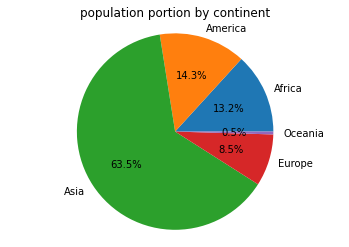

In [56]:
population_size = pie_chart_label['population (thousands)']

fig, ax = plt.subplots()
my_labels = pie_chart_label['continent']
ax.pie(x=population_size, labels=my_labels, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('population portion by continent')

plt.show()

In [58]:
pie_chart_area_label=all_data_no_nan.groupby('continent')['area'].sum().reset_index()
pie_chart_area_label

,continent,area
0,Africa,19681375.0
1,America,28366150.0
2,Asia,27650376.0
3,Europe,5099675.0
4,Oceania,7962491.0


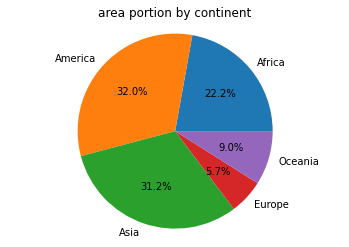

In [59]:
area_portion = pie_chart_area_label['area']

fig, ax = plt.subplots()
my_labels = pie_chart_area_label['continent']
ax.pie(x=area_portion, labels=my_labels, autopct='%1.1f%%')
ax.axis('equal')  
ax.set_title('area portion by continent')

plt.show()

Data measurments: min,max,count,sum

In [15]:
all_data[all_data['Ladder score']==all_data['Ladder score'].min()]

,Country name,continent,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Explained by: Perceptions of corruption,Dystopia + residual,area,population (thousands),avg precipitation,disFromEquator,unemployed_rate_2020,AvgTemp,standard_of_living,independence_year
148,Zimbabwe,Africa,South Asia,2.523,0.038,2.596,2.449,7.695,0.463,52.493,...,0.01,1.895,390757.0,14645468.0,657.0,-1979.838807,5.73,21.0,bad,1980.0


In [16]:
all_data[all_data['Ladder score']==all_data['Ladder score'].max()]

,Country name,continent,Regional indicator,Ladder score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,...,Explained by: Perceptions of corruption,Dystopia + residual,area,population (thousands),avg precipitation,disFromEquator,unemployed_rate_2020,AvgTemp,standard_of_living,independence_year
0,Afghanistan,Asia,Western Europe,7.842,0.032,7.904,7.78,10.775,0.954,72.0,...,0.481,3.253,652230.0,38041754.0,327.0,3834.685659,11.73,12.6,bad,1919.0


In [17]:
all_data.groupby('Regional indicator').size().sort_values(ascending=False) \
  .reset_index(name='Country name')

,Regional indicator,Country name
0,Sub-Saharan Africa,36
1,Western Europe,21
2,Latin America and Caribbean,20
3,Central and Eastern Europe,17
4,Middle East and North Africa,17
5,Commonwealth of Independent States,12
6,Southeast Asia,9
7,South Asia,7
8,East Asia,6
9,North America and ANZ,4


In [18]:
all_data.groupby('continent').size().sort_values(ascending=False) \
  .reset_index(name='Country name')

,continent,Country name
0,Asia,44
1,Africa,41
2,Europe,40
3,America,22
4,Oceania,2


Null identifications and Extra calculations

In [19]:
 all_data.isnull().sum()

Country name                                   0
continent                                      0
Regional indicator                             0
Ladder score                                   0
Standard error of ladder score                 0
upperwhisker                                   0
lowerwhisker                                   0
Logged GDP per capita                          0
Social support                                 0
Healthy life expectancy                        0
Freedom to make life choices                   0
Generosity                                     0
Perceptions of corruption                      0
Ladder score in Dystopia                       0
Explained by: Log GDP per capita               0
Explained by: Social support                   0
Explained by: Healthy life expectancy          0
Explained by: Freedom to make life choices     0
Explained by: Generosity                       0
Explained by: Perceptions of corruption        0
Dystopia + residual 

In [20]:
all_data_no_nan = all_data.copy().dropna()

In [49]:
pie_chart_label=all_data_no_nan.groupby('continent')['population (thousands)'].sum().reset_index()
pie_chart_label

,continent,population (thousands)
0,Africa,8.579673e+08
1,America,9.265919e+08
2,Asia,4.118819e+09
3,Europe,5.545680e+08
4,Oceania,3.028131e+07


In [22]:
all_data['population_precentage']=all_data['population (thousands)'].apply(lambda x: x/7866403556)
all_data['population_precentage'].to_frame()

,population_precentage
0,0.004836
1,0.000363
2,0.005473
3,0.005713
4,0.000376
...,...
144,NaN
145,0.012263
146,NaN
147,0.002271


Correlation examination: Diagnostic  Analysis 

In [23]:
all_data_no_nan.drop(columns=['Standard error of ladder score'],inplace=True)

In [24]:
all_data_no_nan.columns

Index(['Country name', 'continent', 'Regional indicator', 'Ladder score',
       'upperwhisker', 'lowerwhisker', 'Logged GDP per capita',
       'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption', 'Ladder score in Dystopia',
       'Explained by: Log GDP per capita', 'Explained by: Social support',
       'Explained by: Healthy life expectancy',
       'Explained by: Freedom to make life choices',
       'Explained by: Generosity', 'Explained by: Perceptions of corruption',
       'Dystopia + residual', 'area', 'population (thousands)',
       'avg precipitation', 'disFromEquator', 'unemployed_rate_2020',
       'AvgTemp', 'standard_of_living', 'independence_year'],
      dtype='object')

In [61]:
correlation_all_data_no_nan = all_data_no_nan.corr()

print(correlation_all_data_no_nan)

                                            Ladder score  upperwhisker  \
Ladder score                                    1.000000      0.999471   
upperwhisker                                    0.999471      1.000000   
lowerwhisker                                    0.999510      0.997963   
Logged GDP per capita                           0.787524      0.776691   
Social support                                  0.757902      0.749107   
Healthy life expectancy                         0.775802      0.767102   
Freedom to make life choices                    0.625522      0.625184   
Generosity                                     -0.020356     -0.013473   
Perceptions of corruption                      -0.514080     -0.513152   
Ladder score in Dystopia                             NaN           NaN   
Explained by: Log GDP per capita                0.787523      0.776692   
Explained by: Social support                    0.757911      0.749114   
Explained by: Healthy life expectancy 

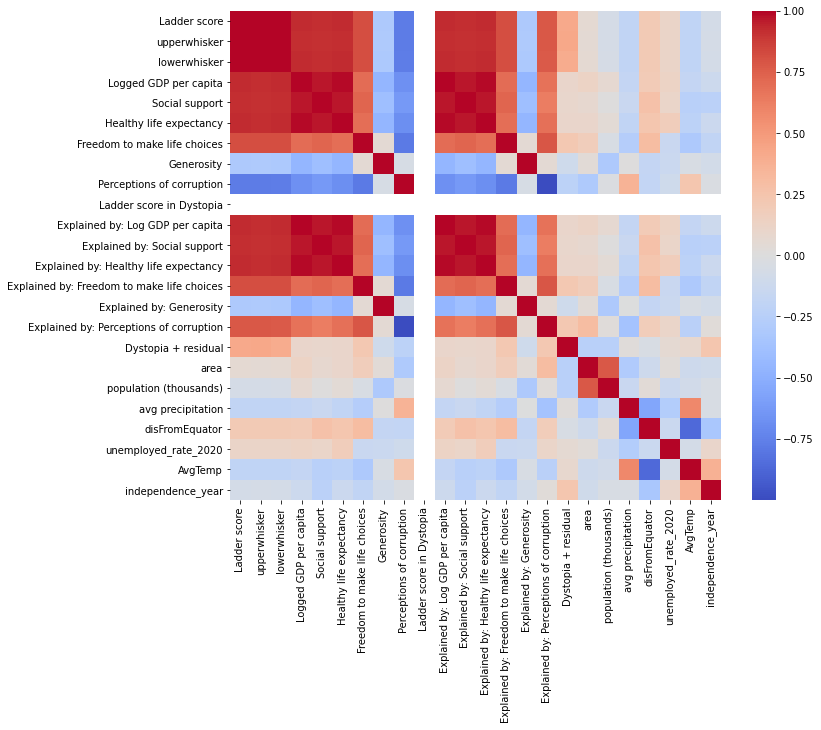

In [27]:
corr=correlation_all_data_no_nan.corr()
plt.subplots(figsize=(11,9))
sns.heatmap(corr, cmap='coolwarm')
plt.show()

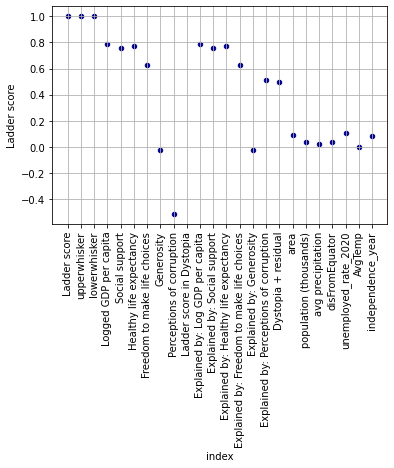

In [28]:
ax1 = correlation_all_data_no_nan['Ladder score'].to_frame().reset_index().plot.scatter(x='index', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

In [29]:
correlation_all_data_no_nan['Ladder score'].to_frame().reset_index().columns

Index(['index', 'Ladder score'], dtype='object')

Showing interesting correlations between the Ladder score and all of the other parameters, from the not null dataset (customized dataset)

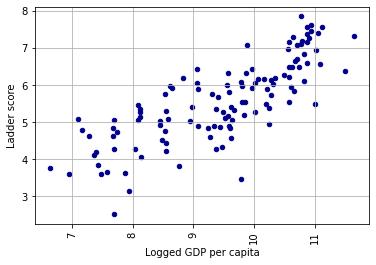

In [30]:
ax1 = all_data_no_nan.plot.scatter(x='Logged GDP per capita', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

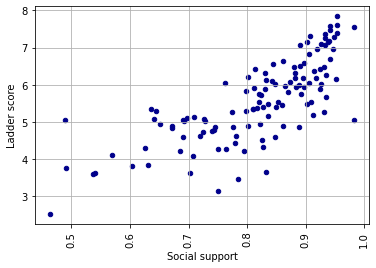

In [31]:
ax1 = all_data_no_nan.plot.scatter(x='Social support', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

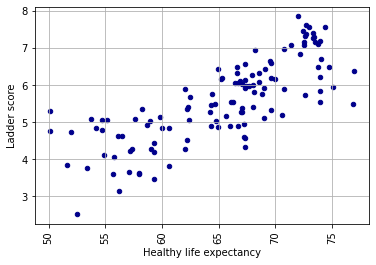

In [32]:
ax1 = all_data_no_nan.plot.scatter(x='Healthy life expectancy', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

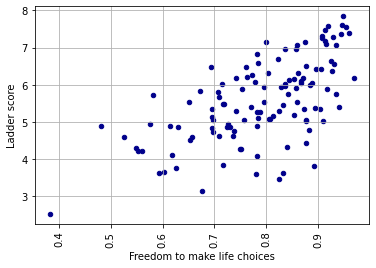

In [33]:
ax1 = all_data_no_nan.plot.scatter(x='Freedom to make life choices', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

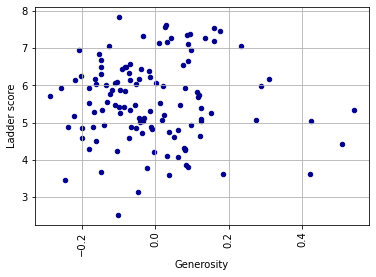

In [34]:
ax1 = all_data_no_nan.plot.scatter(x='Generosity', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

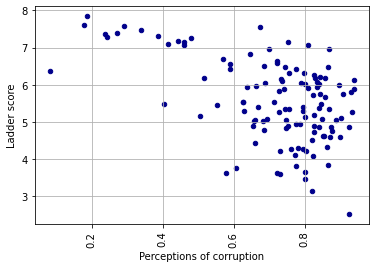

In [35]:
ax1 = all_data_no_nan.plot.scatter(x='Perceptions of corruption', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

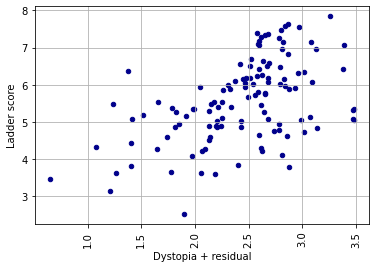

In [36]:
ax1 = all_data_no_nan.plot.scatter(x='Dystopia + residual', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

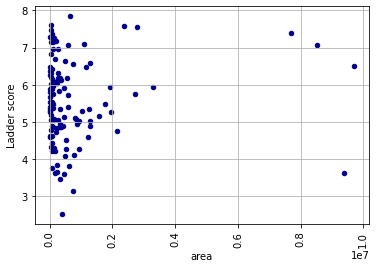

In [37]:
ax1 = all_data_no_nan.plot.scatter(x='area', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

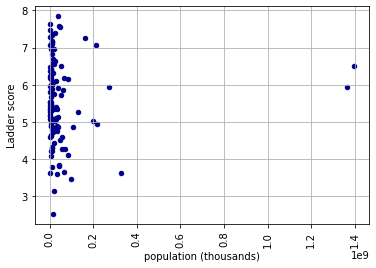

In [38]:
ax1 = all_data_no_nan.plot.scatter(x='population (thousands)', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

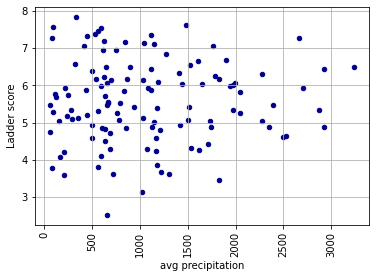

In [39]:
ax1 = all_data_no_nan.plot.scatter(x='avg precipitation', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

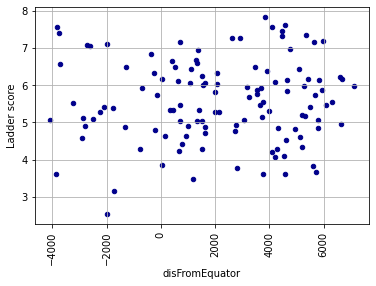

In [40]:
ax1 = all_data_no_nan.plot.scatter(x='disFromEquator', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

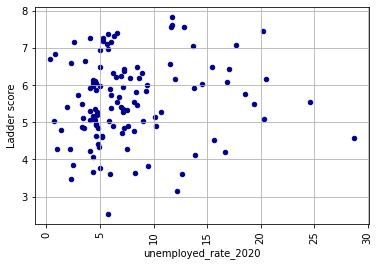

In [41]:
ax1 = all_data_no_nan.plot.scatter(x='unemployed_rate_2020', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

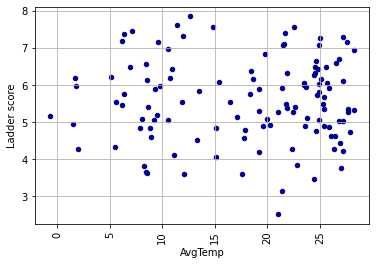

In [42]:
ax1 = all_data_no_nan.plot.scatter(x='AvgTemp', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

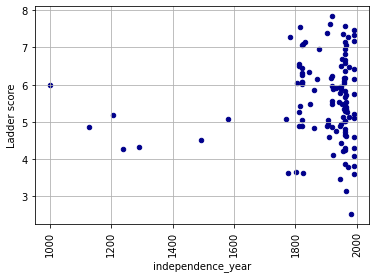

In [43]:
ax1 = all_data_no_nan.plot.scatter(x='independence_year', y='Ladder score', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

Interesting correlation between 2 parameters (not Ladder Score)

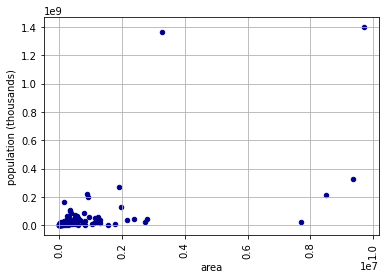

In [44]:
ax1 = all_data_no_nan.plot.scatter(x='area', y='population (thousands)', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

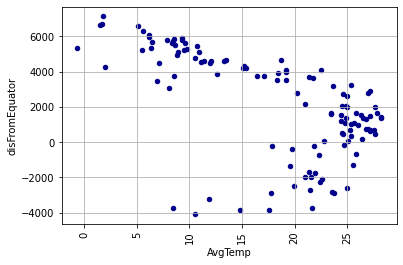

In [45]:
ax1 = all_data_no_nan.plot.scatter(x='AvgTemp', y='disFromEquator', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show()

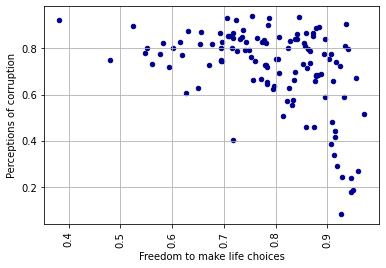

In [46]:
ax1 = all_data_no_nan.plot.scatter(x='Freedom to make life choices', y='Perceptions of corruption', c='DarkBlue')
plt.xticks(rotation=90)
plt.grid()
plt.show() 

In [62]:
clean_data=all_data_no_nan.copy().drop(['Explained by: Log GDP per capita','Explained by: Social support','Explained by: Healthy life expectancy','Explained by: Freedom to make life choices','Explained by: Generosity','Explained by: Perceptions of corruption','Country name','continent','Regional indicator','standard_of_living'],axis=1)
clean_data = clean_data.reset_index()
clean_data.to_csv(r"C:\Users\User\Desktop\Final Project\clean_data.csv")

In [135]:
X_train, X_test, y_train , y_test = train_test_split(clean_data.copy().drop(['Ladder score'],axis=1), clean_data['Ladder score'], test_size=0.33)
                                                                                                     
regressor = ElasticNet()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)
mean_squared_error(y_test, y_pred)
r2_score(y_test, y_pred)


0.9699852768073505

In [64]:
mean_squared_error(y_test, y_pred)

0.08239875137604971

In [65]:
X, y = datasets.load_iris(return_X_y=True)
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(clean_data.copy().drop(['Ladder score'],axis=1), clean_data['Ladder score'], test_size=0.4, random_state=0)


In [66]:
X_train.shape, y_train.shape

((72, 18), (72,))

In [67]:
X_test.shape, y_test.shape

((48, 18), (48,))

In [68]:
X = clean_data.copy().drop(['Ladder score'],axis=1)
y = clean_data['Ladder score']
lasso = linear_model.Lasso()

In [69]:
cv_results = cross_validate(lasso, X, y, cv=5)
sorted(cv_results.keys())
cv_results['test_score']
print (cv_results)

{'fit_time': array([0.00897479, 0.00498652, 0.00498605, 0.00398922, 0.00498605]), 'score_time': array([0.00299335, 0.00398922, 0.00398636, 0.00398731, 0.00299215]), 'test_score': array([ 0.09821237, -0.90541134,  0.97392241, -0.83353581,  0.35479536])}


In [70]:
scores = cross_validate(lasso, X, y, cv=5, scoring=('r2', 'neg_mean_squared_error'),return_train_score=True)
print(scores['test_neg_mean_squared_error'])
scores.keys()

[-0.11449644 -0.05603288 -0.00115612 -0.03750298 -0.16840475]


dict_keys(['fit_time', 'score_time', 'test_r2', 'train_r2', 'test_neg_mean_squared_error', 'train_neg_mean_squared_error'])

In [147]:
clf = tree.DecisionTreeRegressor()
cv_results = cross_validate(clf, X, y, cv=5)
print (cv_results) 

{'fit_time': array([0.00698161, 0.00299382, 0.00295877, 0.0029912 , 0.00302148]), 'score_time': array([0.00299144, 0.00202608, 0.00202417, 0.00196695, 0.00099468]), 'test_score': array([-3.30914818, -0.78209692,  0.36810549, -2.01653412, -2.29779755])}


In [117]:
neigh = KNeighborsRegressor(n_neighbors=5)

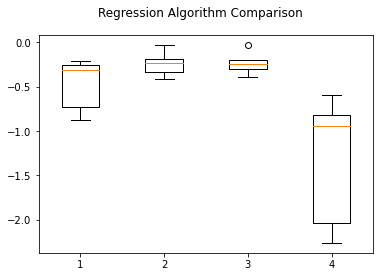

In [183]:
models = [clf,lasso,regressor,neigh]
results = []
names = ['DecisionTree','lasso','ElasticNet','KNeighborsRegressor']
for model in models:
    cv_results = cross_validate(model,X, y, cv=5, scoring=('neg_root_mean_squared_error'))
    results.append(cv_results['test_score'])

fig = plt.figure()
fig.suptitle('Regression Algorithm Comparison')
plt.boxplot(results)
#plt.xticks(names)
plt.show()

KPI's

In [263]:
print("R2 (explained variance):", round(metrics.r2_score(y_test, y_pred), 2))
print("Mean Absolute Perc Error (Σ(|y-pred|/y)/n):", round(np.mean(np.abs((y_test-y_pred)/y_pred)), 2))
print("Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)):", (np.sqrt(metrics.mean_squared_error(y_test, y_pred))))
print("Max Error:", (max_error))

R2 (explained variance): 0.97
Mean Absolute Perc Error (Σ(|y-pred|/y)/n): 0.03
Root Mean Squared Error (sqrt(Σ(y-pred)^2/n)): 0.16825787424414348
Max Error: 0.323040077663709


Residuals - all 4 models

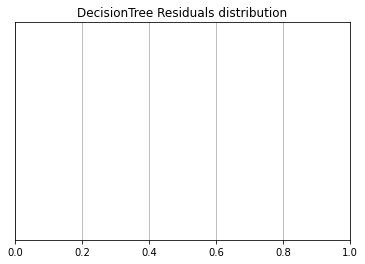

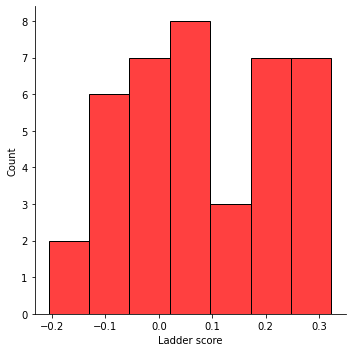

In [328]:
models = [clf]
for model in models:
    residuals = y_test - y_pred
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], y_pred[max_idx]

fig, ax = plt.subplots()
sns.displot(residuals, color="red")
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="DecisionTree Residuals distribution")
plt.show()

Max Error: 0.323040077663709


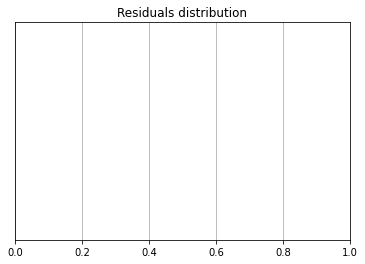

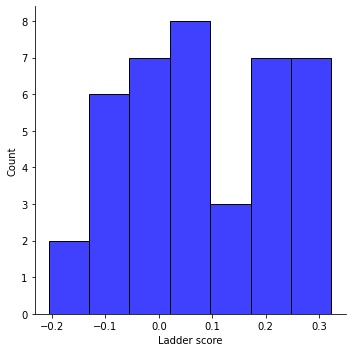

In [321]:
models = [lasso]
for model in models:
    residuals = y_test - y_pred
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], y_pred[max_idx]
print("Max Error:",(max_error))

fig, ax = plt.subplots()
sns.displot(residuals, color="blue")
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()

Max Error: 0.323040077663709


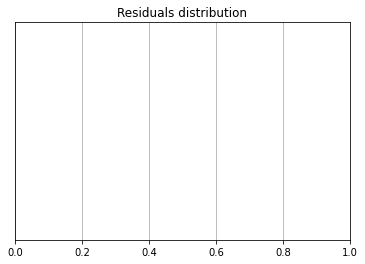

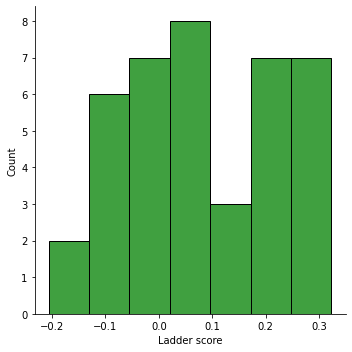

In [322]:
models = [regressor]
for model in models:
    residuals = y_test - y_pred
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], y_pred[max_idx]
print("Max Error:",(max_error))

fig, ax = plt.subplots()
sns.displot(residuals, color="green")
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()

Max Error: 0.323040077663709


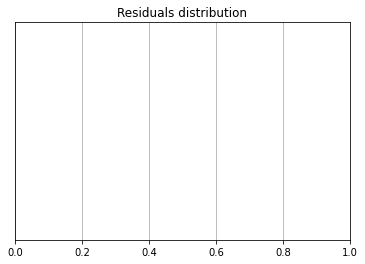

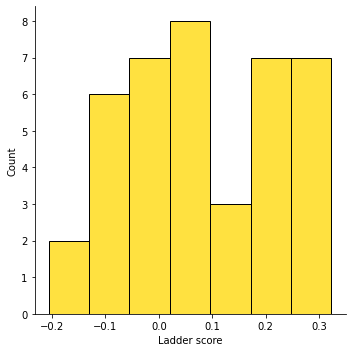

In [323]:
models = [neigh]
for model in models:
    residuals = y_test - y_pred
max_error = max(residuals) if abs(max(residuals)) > abs(min(residuals)) else min(residuals)
max_idx = list(residuals).index(max(residuals)) if abs(max(residuals)) > abs(min(residuals)) else list(residuals).index(min(residuals))
max_true, max_pred = y_test[max_idx], y_pred[max_idx]
print("Max Error:",(max_error))

fig, ax = plt.subplots()
sns.displot(residuals, color="gold")
ax.grid(True)
ax.set(yticks=[], yticklabels=[], title="Residuals distribution")
plt.show()

Feature importance - Linear Regression model

Feature: 0, Score: 0.00000
Feature: 1, Score: 23.16983
Feature: 2, Score: 7.98984
Feature: 3, Score: 0.00000
Feature: 4, Score: 72.17871
Feature: 5, Score: -0.00000
Feature: 6, Score: -0.00000
Feature: 7, Score: 17.01315
Feature: 8, Score: 0.00000
Feature: 9, Score: 67.05859


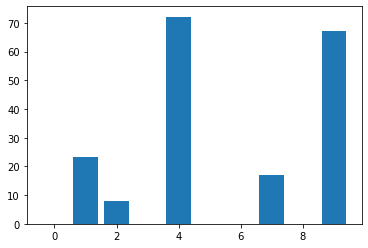

In [314]:
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
    print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

Predicted vs True

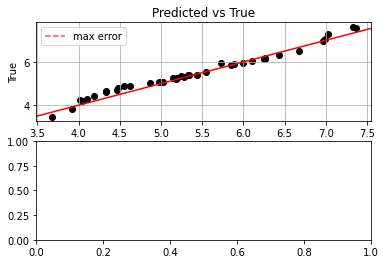

In [313]:
fig, ax = plt.subplots(2, 1)
ax[0].scatter(y_pred, y_test, color="black")
abline_plot(intercept=0, slope=1, color="red", ax=ax[0])
ax[0].vlines(x=max_pred, ymin=max_true, ymax=max_true-max_error, color='red', linestyle='--', alpha=0.7, label="max error")
ax[0].grid(True)
ax[0].set(xlabel="Predicted", ylabel="True", title="Predicted vs True")
ax[0].legend()
pyplot.show()